In [1]:
# Copyright (c) 2020 Thomas A. House
# See file LICENCE for licensing information

# Growth rates estimates in Europe using GLM
# Figure 2 (main text) and figure S3 (electronic supplementary material) of:
# 
# Pellis L, Scarabel F, Stage HB, Overton CE, Chappell LHK, Fearon E, Bennett E, 
# University of Manchester COVID-19 Modelling Group, Lythgoe KA, House TA and Hall I, 
# "Challenges in control of COVID-19: short doubling time and long delay to effect of interventions", 
# Philosophical Transactions of the Royal Society B (2021)

In [2]:
%matplotlib inline
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import scipy.optimize as op
from datetime import datetime
from datetime import timedelta

In [3]:
df = pd.read_csv('./WHO_data_18.csv')
df

,Day,Date (actual),Austria,Belgium,Czechia,Denmark,France,Germany,Ireland,Italy,Luxembourg,Netherlands,Norway,Poland,Portugal,Romania,Spain,Sweden,Switzerland,UK
0,0,09/01/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,10/01/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,11/01/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,12/01/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,13/01/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,77,26/03/2020,7029,6235,2062,1877,28786,42288,1819,80539,1453,7431,3156,1221,3544,1029,56188,2806,10714,11662
78,78,27/03/2020,7697,7284,2279,2046,32542,48582,2121,86498,1605,8603,3581,1389,4268,1292,64059,3046,12104,14547
79,79,28/03/2020,8291,9134,2663,2201,37145,52547,2415,92472,1831,9762,3845,1638,5170,1452,72248,3447,13152,17093
80,80,29/03/2020,8813,10836,2829,2395,39642,57298,2615,97689,1950,10866,4102,1862,5962,1760,78797,3700,14274,19526


In [4]:
dt = datetime.fromisoformat('2020-01-09 00:00:01')
dt

datetime.datetime(2020, 1, 9, 0, 0, 1)

In [5]:
cols = df.columns
print(cols)

Index(['Day', 'Date (actual)', 'Austria', 'Belgium', 'Czechia', 'Denmark',
       'France', 'Germany', 'Ireland', 'Italy', 'Luxembourg', 'Netherlands',
       'Norway', 'Poland', 'Portugal', 'Romania', 'Spain', 'Sweden',
       'Switzerland', 'UK'],
      dtype='object')


In [6]:
nd = 2 # Number of date columns
nc = len(cols)-nd # Number of country columns
nc

18

In [7]:
numbered_days = df.Day.values
numbered_days

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81])

In [8]:
def mynll(y,x,tt):
    mu = x[0]*np.exp(x[1]*tt)
    od = x[2]*np.ones(len(tt))
    p = 1/od
    r = mu/(od-1)
    return -np.sum(st.nbinom.logpmf(y,r,p))

In [9]:
dd = np.arange(42,81,8)
xl = []
for j in range(0,len(dd)):
    xl.append((dt + timedelta(days=(int(dd[j])))).strftime('%d/%m'))

In [10]:
start_day = np.zeros(nc)
ncstart = 20.0 # Start when there are ncstart cumulative cases 
day_ran = 9.0

61.0

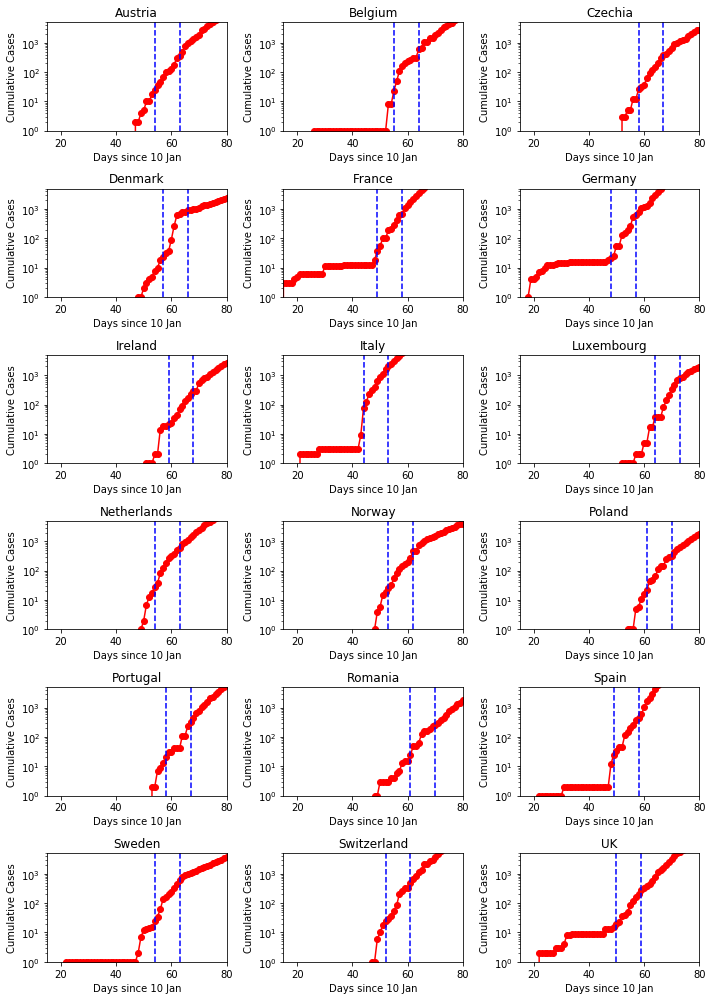

In [11]:
plt.figure(figsize=(10,14))
for i in range(0,nc):
    cdf = df[[df.columns[nd+i]]] # Country dataframe
    name = cdf.columns[0]
    cum = cdf.values.T[0] # Cumulative
    start_day[i] = np.argmax(cum >= ncstart)
    plt.subplot(6,3,i+1)
    plt.plot(numbered_days,cum,marker='o',c='r')
    ym = 5000
    plt.ylim([1, ym])
    plt.xlim([15, 80])
    plt.plot(start_day[i]*np.array([1.0, 1.0]),[1,ym],linestyle='--',c='b')
    plt.plot((start_day[i]+day_ran)*np.array([1.0, 1.0]),[1,ym],linestyle='--',c='b')
    plt.yscale('log')
    plt.title(name)
    plt.xlabel('Days since 10 Jan')
    plt.ylabel('Cumulative Cases')
plt.tight_layout()
start_day[13]

In [12]:
# Explore different corrections based on observed cumulative cases
# Final choice for Figures 2 and S2 in the published paper:
# start_day[3] -= 2 for Denmark (no window looks ideal, given change in testing on 12 March: https://videnskab.dk/coronavirus#danmark)
# start_day[13] += 7 for Romania (to exclude a phase dominated by imported cases -- re-entries facilitated till 17 March: see e.g. https://stirioficiale.ro/informatii/comunicat-de-presa-privind-acordarea-de-asistenta-cetatenilor-romani-din-strainatate-in-context-covid-19-17-martie-2020)
# In the absence of specific reasons, the window for other countries has not been changed from baseline 

# First reset:
for i in range(0,nc):
    cdf = df[[df.columns[nd+i]]] # Country dataframe
    name = cdf.columns[0]
    cum = cdf.values.T[0] # Cumulative
    start_day[i] = np.argmax(cum >= ncstart)
# Then perform custom changes:
start_day[3] -= 2 # Denmark
start_day[4] += 0 # France
start_day[5] += 0 # Germany
start_day[13] += 7 # Romania
start_day[14] += 0 # Spain
start_day[17] += 0 # UK

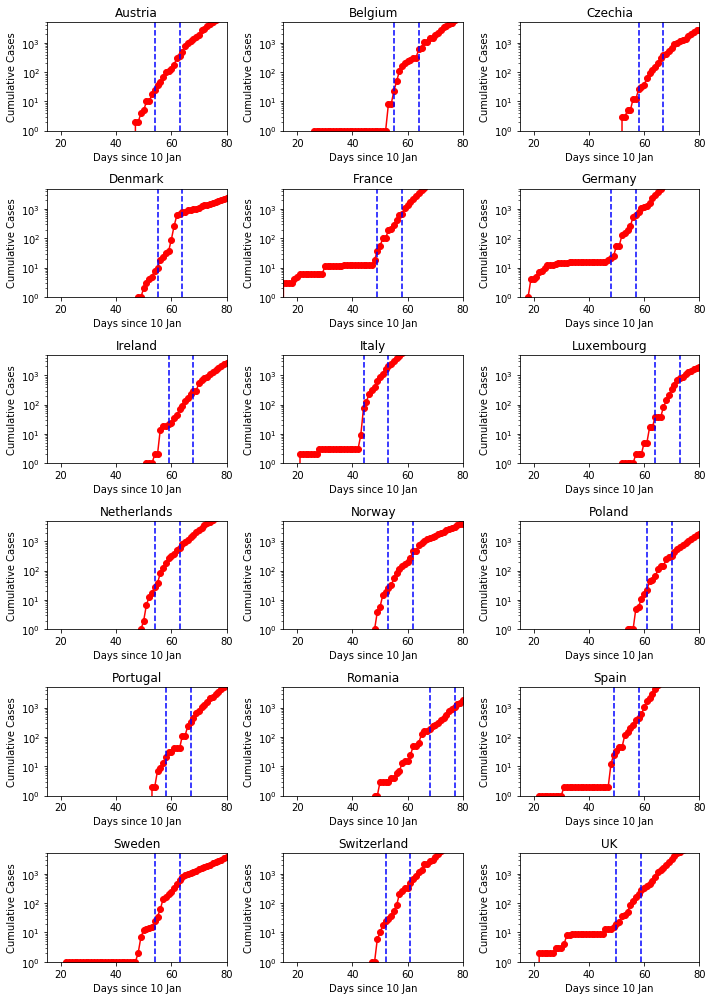

In [13]:
# Re-do cumulative figure with corrections
plt.figure(figsize=(10,14))
for i in range(0,nc):
    cdf = df[[df.columns[nd+i]]] # Country dataframe
    name = cdf.columns[0]
    cum = cdf.values.T[0] # Cumulative
    # start_day set up above to account for custom changes
    plt.subplot(6,3,i+1)
    plt.plot(numbered_days,cum,marker='o',c='r')
    ym = 5000
    plt.ylim([1, ym])
    plt.xlim([15, 80])
    plt.plot(start_day[i]*np.array([1.0, 1.0]),[1,ym],linestyle='--',c='b')
    plt.plot((start_day[i]+day_ran)*np.array([1.0, 1.0]),[1,ym],linestyle='--',c='b')
    plt.yscale('log')
    plt.title(name)
    plt.xlabel('Days since 10 Jan')
    plt.ylabel('Cumulative Cases')
plt.tight_layout()

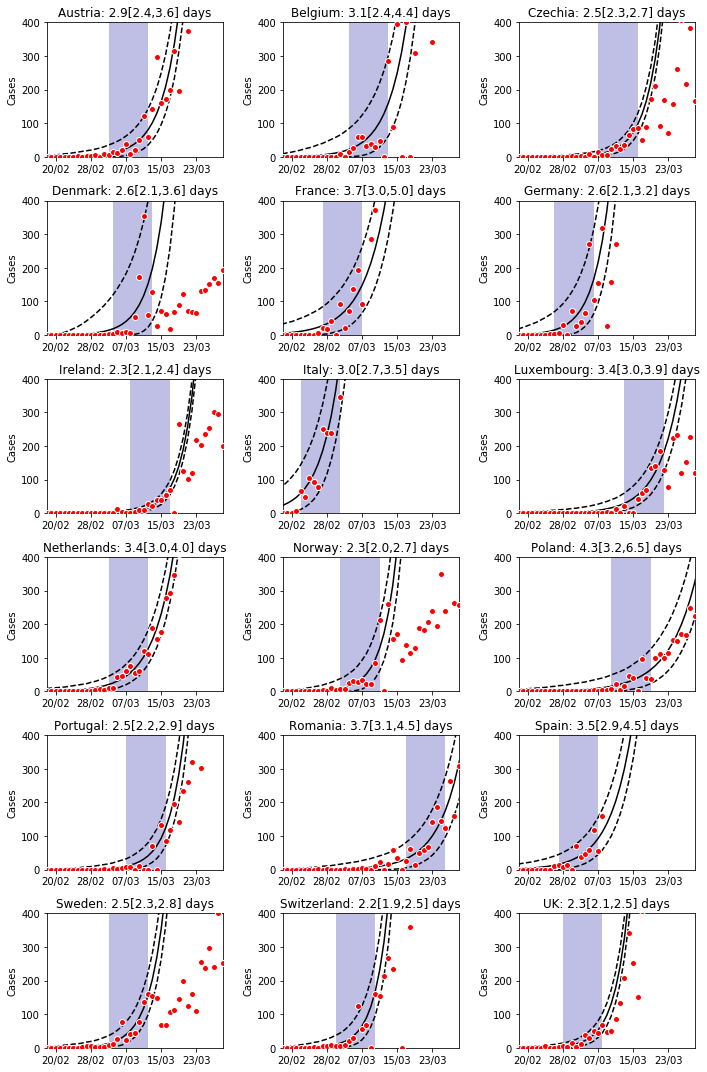

In [14]:
x01 = np.array([ncstart,0.25,5])
h = 1e-3
plt.figure(figsize=(10,15))
for i in range(0,nc):
    cdf = df[[df.columns[nd+i]]] # Country Data Frame
    name = cdf.columns[0]
    cum = cdf.values.T[0]
    inc = np.diff(np.append(np.array([0]),cum))
    
    sd = int(start_day[i])
    ed = sd+int(day_ran)
        
    yy = inc[sd:(ed+1)].copy()
    tt = np.arange(0,len(yy))
    jj = (yy!=0.0)
    yy = yy[jj]
    tt = tt[jj]
    
    ax = plt.subplot(6,3,i+1)
    
    nll = lambda xx: mynll(yy,xx,tt.copy())
    fout = op.minimize(nll,x01,method='Nelder-Mead')
    sig = h/np.sqrt(nll(fout.x + np.array([0.0, h, 0.0])) - 2.0*nll(fout.x) + nll(fout.x - np.array([0.0, h, 0.0])))
    dt0 = np.log(2.0)/fout.x[1]
    dtl = np.log(2.0)/(fout.x[1] + 2.0*sig)
    dtu = np.log(2.0)/(fout.x[1] - 2.0*sig)
    
    mu = fout.x[0]*np.exp(fout.x[1]*(numbered_days-numbered_days[sd]))
    od = fout.x[2]*np.ones(len(numbered_days))
    p = 1/od
    r = mu/(od-1)
    plt.plot(numbered_days,mu,linestyle='-',c='k',label='Doubling time {:.1f} days'.format(dt0),zorder=1)
    plt.plot(numbered_days,st.nbinom.ppf(0.025,r,p),linestyle='--',c='k',zorder=2)
    plt.plot(numbered_days,st.nbinom.ppf(0.975,r,p),linestyle='--',c='k',zorder=2)
    ym = 400 # Fix y-axis range across all plots
    rect = patches.Rectangle((sd,0),day_ran,ym,facecolor=[0.75,0.75,0.9],zorder=1)
    ax.add_patch(rect)
    plt.scatter(numbered_days,inc,marker='o',c='r',edgecolor='w',label='Data',zorder=3)
    plt.title(name + ': {:.1f}[{:.1f},{:.1f}] days'.format(dt0,dtl,dtu))
    plt.xlim([40,80])
    plt.ylim([0, ym])
    plt.xticks(dd,xl)
    plt.ylabel('Cases')
plt.tight_layout()
plt.savefig('GLM_GrowthRate_Linear.pdf')

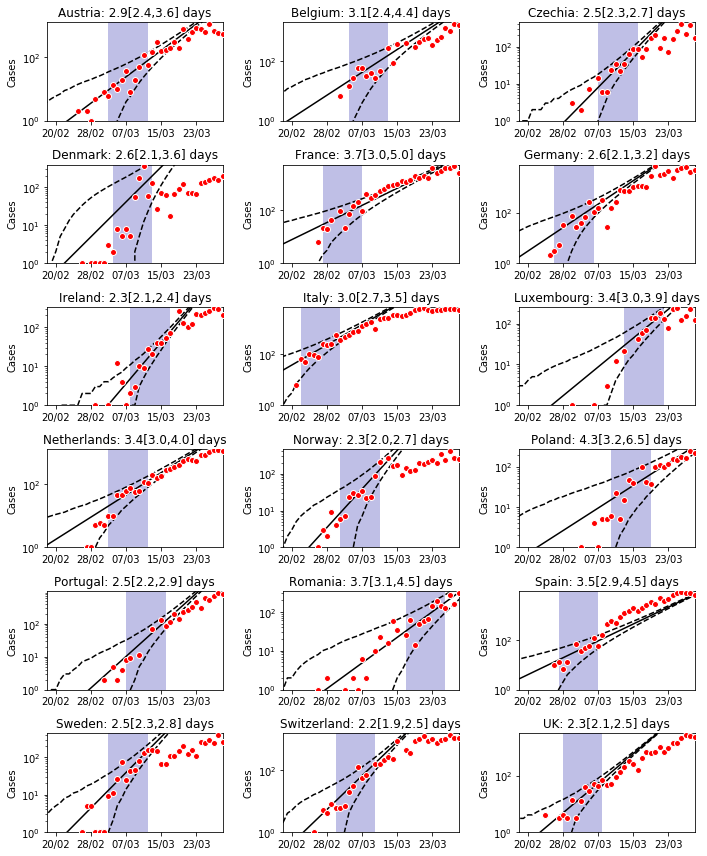

In [15]:
x01 = np.array([ncstart,0.25,5])
h = 1e-3
plt.figure(figsize=(10,12))
for i in range(0,nc):
    cdf = df[[df.columns[nd+i]]]
    name = cdf.columns[0]
    cum = cdf.values.T[0]
    inc = np.diff(np.append(np.array([0]),cum))
    
    sd = int(start_day[i])
    ed = sd+int(day_ran)
        
    yy = inc[sd:(ed+1)].copy()
    tt = np.arange(0,len(yy))
    jj = (yy!=0.0)
    yy = yy[jj]
    tt = tt[jj]
    
    ax = plt.subplot(6,3,i+1)
    
    nll = lambda xx: mynll(yy,xx,tt.copy())
    fout = op.minimize(nll,x01,method='Nelder-Mead')
    sig = h/np.sqrt(nll(fout.x + np.array([0.0, h, 0.0])) - 2.0*nll(fout.x) + nll(fout.x - np.array([0.0, h, 0.0])))
    dt0 = np.log(2.0)/fout.x[1]
    dtl = np.log(2.0)/(fout.x[1] + 2.0*sig)
    dtu = np.log(2.0)/(fout.x[1] - 2.0*sig)
    
    mu = fout.x[0]*np.exp(fout.x[1]*(numbered_days-numbered_days[sd]))
    od = fout.x[2]*np.ones(len(numbered_days))
    p = 1/od
    r = mu/(od-1)
    plt.plot(numbered_days,mu,linestyle='-',c='k',label='Doubling time {:.1f} days'.format(dt0),zorder=1)
    plt.plot(numbered_days,st.nbinom.ppf(0.025,r,p),linestyle='--',c='k',zorder=2)
    plt.plot(numbered_days,st.nbinom.ppf(0.975,r,p),linestyle='--',c='k',zorder=2)
    ym = 1.1*np.max(inc) # Different y-axis range for each plot
    rect = patches.Rectangle((sd,0),day_ran,ym,facecolor=[0.75,0.75,0.9],zorder=1)
    ax.add_patch(rect)
    plt.scatter(numbered_days,inc,marker='o',c='r',edgecolor='w',label='Data',zorder=3)
    plt.title(name + ': {:.1f}[{:.1f},{:.1f}] days'.format(dt0,dtl,dtu))
    plt.xlim([40,80])
    plt.ylim([0, ym])
    plt.xticks(dd,xl)
    plt.ylabel('Cases')
    plt.yscale('log')
    plt.ylim([1,ym])
plt.tight_layout()
plt.savefig('GLM_GrowthRate_Log.pdf')